<h1> Efficient Image Tiling for Annotated Datasets</h1>

<p>In some of our projects, we faced a recurring problem: we had large images that sometimes contained only a few annotations. When we trained these images using a model—especially a segmentation model—it took a long time and consumed a significant amount of computational units on Google Colab. To optimize the process, we decided to divide the large images into smaller tiles and select only the ones that contained annotations. Our goal was to split a large image into the minimum number of tiles while ensuring that all annotations were included. This document explains our solution to this problem.</p>

<h2>⚙️ Algorithm Steps:</h2>

<h4>The following steps were implemented to resolve the problem:</h4>

<ol>
    <li> Divide the image into tiles with a defined size and stride.</li>
    <li>Cluster the annotations according to the tiles they belong to.</li>
    <li>During each loop, choose the tile with the highest count of new annotations.</li>
</ol>

<h3>1- Divide the image into tiles with a defined size and stride:</h3>
<p>As a first step, the image is divided into smaller tiles based on a specified size (tile_height, tile_width) and a predefined stride.</p>


<p align="center">
<img src="https://github.com/saiwa-ai/roi-cropping/raw/main/resources/efficient-tiling.gif" alt="efficient_tiling.gif">
</p>

<h3>2- Cluster the annotations according to the tiles they belong to.</h3>
<p>In the second step, the annotations are clustered and assigned each one to the corresponding image tile. This ensures that every annotation is linked to the correct region of the original image after tiling.</p>

<ul>
    <li><b>Polygon Visibility Threshold</b>: An optional parameter allows the user to define a visibility threshold for polygons. During clustering annotations, if the visible area of a polygon within a tile is greater than or equal to the specified threshold (as a percentage of the polygon’s total area), the polygon is considered to belong to that tile. This helps ensure that only sufficiently visible polygons are associated with each tile, avoiding partial or insignificant overlaps.<br>
    <b>Example</b>:
    If the threshold is set to 0.3, then at least 30% of the polygon’s area must be visible in the tile for it to be included.
</li>
</ul>

<h3>3- During each loop, choose the tile with the highest count of new annotations.</h3>
<p>In the final step, I iteratively select tiles based on the number of new (previously unselected) annotations they contain. During each loop, I choose the tile that has the highest count of new annotations. After selecting a tile, I remove it from the pool and repeat the process with the remaining tiles, always prioritizing the tile with the most new annotations in each round. This helps maximize annotation coverage efficiently.</p>

<p align="center">
<img src="https://github.com/saiwa-ai/roi-cropping/raw/main/resources/choosing_optimal_tiles.gif" alt="choosing_optimal_tiles.gif">
</p>

<h2>🔬 Algorithm Summary Visualization</h2>
<p>The algorithm efficiently tiles large images into the fewest possible tiles based on user-specified sizes while preserving all annotations. In this image below, a <b>5472×3648</b> image was divided into two <b>1280×1280</b> tiles, fully covering all bounding box annotations:</p>
<p align="center">
<img src="https://github.com/saiwa-ai/roi-cropping/raw/main/resources/algorithm_summary_visualization.gif" alt="algorithm_summary_visualization.gif">
</p>


✅ To run this algorithm, follow the steps below in order:
You'll start by cloning the repository, installing dependencies, setting up the configuration, and then running the main script to process your image.

### 📥 Clone the Repository

We start by cloning the GitHub repository to access the codebase.

In [1]:
# Clone the repository
!git clone https://github.com/saiwa-ai/roi-cropping.git

Cloning into 'roi-cropping'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 91 (delta 43), reused 76 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 11.25 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
# Change into the repository directory and install dependencies
%cd /content/roi-cropping

/content/roi-cropping


### 📦 Install Dependencies

Install Python packages listed in the `requirements.txt` file.

> ♻️ **Note:** After installing the dependencies, it's recommended to **restart the Colab runtime** to ensure all packages are properly loaded.

In [3]:
# Install required packages
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.5/477.5 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.10
    Uninstalling pycocotools-2.0.10:
      Successfully uninstalled pycocotools-2.0.10
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the package

<h2>📖 How to Run the Algorithm</h2>

<p>
  This application supports two modes of inference:
</p>

<h3>🔹 1. Multiple Images</h3>
<p>
  Use this method to tile and run inference on an entire dataset of images.
</p>

<pre><code>python run_app_multiple_image.py  configs/config_multiple_images.json</code></pre>

<p><strong>Example config_multiple.json</strong></p>
<pre><code>{
  "input_annotation_path": "/path/to/input/test.json",
  "output_annotation_path": "/path/to/output/test.json",
  "images_dir": "/path/to/input/images",
  "tile_size": [1280, 1280],
  "stride": [640, 640],
  "polygon_visibility_threshold": 0.9,
  "output_dir": "/path/to/output/images",
  "draw_annotations": false
}</code></pre>

<hr>

<h3>🔹 2. Single Image</h3>
<p>
  Use this method to tile and run inference on a single image.
</p>

<pre><code>python run_app_single_image.py configs/config_single_image.json</code></pre>

<p><strong>Example config_single.json</strong></p>
<pre><code>{
  "input_annotation_path": "data/input/annotations/test.json",
  "output_annotation_path": "data/output/updated_test.json",
  "image_path": "data/input/images/UASs_18.jpg",
  "tile_size": [1280, 1280],
  "stride": [640, 640],
  "polygon_visibility_threshold": 0.8,
  "output_dir": "data/output/UASs_276_test",
  "draw_annotations": true
}</code></pre>

<hr>

## 📸 Original Image Preview

Before running the main script, here's a sample input image.

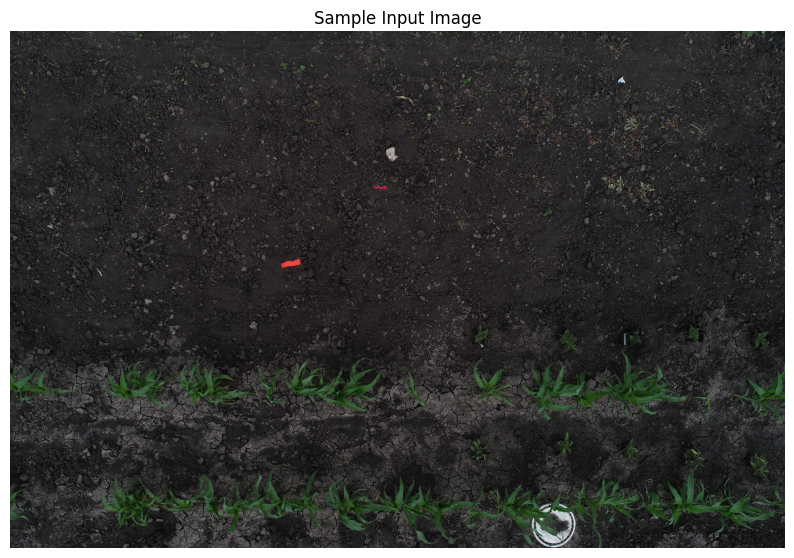

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/roi-cropping/test_data/images/test_0.jpg"
img = Image.open(image_path)

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Sample Input Image')
plt.show()

<h2>🛠️ Set Configuration</h2>

<p><strong>🔔 Note:</strong> The <code>input_annotation_path</code> must point to an annotation file in <strong>COCO format</strong>.</p>


<p><strong>📋 Parameters Description:</strong></p>

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Key</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>input_annotation_path</code></td>
      <td>str</td>
      <td>Path to the input annotation JSON file (COCO format)</td>
    </tr>
    <tr>
      <td><code>images_dir</code> / <code>image_path</code></td>
      <td>str</td>
      <td>Directory of images (for multiple) or single image path</td>
    </tr>
    <tr>
      <td><code>tile_size</code></td>
      <td>list[int, int]</td>
      <td>Size of the tiles used to process each image (width x height)</td>
    </tr>
    <tr>
      <td><code>stride</code></td>
      <td>list[int, int]</td>
      <td>Stride used for tiling, controls overlap between tiles</td>
    </tr>
    <tr>
      <td><code>polygon_visibility_threshold</code></td>
      <td>float</td>
      <td>Minimum visible area ratio of a polygon to keep it</td>
    </tr>
    <tr>
      <td><code>output_dir</code></td>
      <td>str</td>
      <td>Directory where the output (images and annotations) will be saved</td>
    </tr>
  </tbody>
</table>

<p>
Then set your desired configuration using the parameters above.</p>


In [2]:
import json
from pathlib import Path

# Define configuration dictionary
configurations = {
    "input_annotation_path":"/content/roi-cropping/test_data/annotations/test_0.json",
    "image_path":"/content/roi-cropping/test_data/images/test_0.jpg",
    "tile_size":[1280, 1280],
    "stride":[640, 640],
    "polygon_visibility_threshold":0.8,
    "output_dir":"/content/roi-cropping/output",
}

# Path to save the config file
config_path = Path("/content/roi-cropping/configs/config_single_image.json")

# Make sure the directory exists
config_path.parent.mkdir(parents=True, exist_ok=True)

# Save the dictionary as a pretty JSON file
with open(config_path, 'w') as f:
    json.dump(configurations, f, indent=4)

print(f"Configuration saved successfully at: {config_path}")

Configuration saved successfully at: /content/roi-cropping/configs/config_single_image.json


## 🚀 Run the Algorithm on Single Image
  This script tiles a single input image according to the settings in your configuration file, clusters annotations to their corresponding tiles, and selects only the optimal tiles that maximize annotation coverage.

> ✅ **Make sure you have prepared your single-image configuration file (config_single_image.json) before running this step.**


In [3]:
# Change into the repository directory and run the algorithm
%cd /content/roi-cropping

/content/roi-cropping


In [4]:
!python run_app_single_image.py "/content/roi-cropping/configs/config_single_image.json"

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
{
    "success": true,
    "result": "All generated tiles are saved in: /content/roi-cropping/output",
    "error": null
}
